In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
link = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [12]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction' ,'Age' ,'Outcome']

In [13]:
data_df = pd.read_csv(link,names=columns)
data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
X = data_df.drop('Outcome',axis=1)
y = data_df['Outcome']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
data_dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
data_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [17]:
data_rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
data_rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [18]:
print("Decision Tree - Training Accuracy:",data_dt_clf.score(X_train,y_train))
print("Decision Tree - Testing Accuracy:",data_dt_clf.score(X_test,y_test))
print("Random forest - Training Accuracy:",data_rf_clf.score(X_train,y_train))
print("Random forest - Testing Accuracy:",data_rf_clf.score(X_test,y_test))

Decision Tree - Training Accuracy: 0.7635009310986964
Decision Tree - Testing Accuracy: 0.7186147186147186
Random forest - Training Accuracy: 1.0
Random forest - Testing Accuracy: 0.7532467532467533


In [23]:
importances = data_rf_clf.feature_importances_
feat_importance = pd.Series(importances,index=X.columns).sort_values(ascending=False)
feat_importance

Glucose                     0.282089
BMI                         0.158120
Age                         0.142116
DiabetesPedigreeFunction    0.113127
BloodPressure               0.084052
Pregnancies                 0.080552
SkinThickness               0.070559
Insulin                     0.069385
dtype: float64

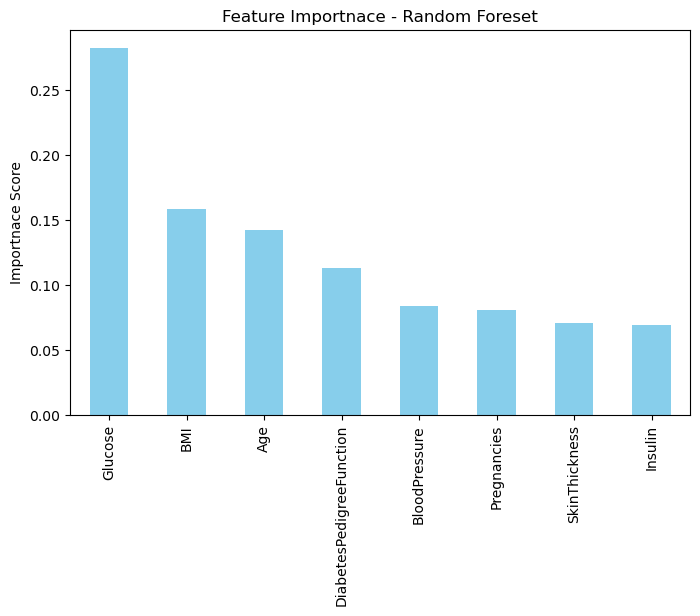

In [24]:
plt.figure(figsize=(8,5))
feat_importance.plot(kind='bar',color='skyblue')
plt.title('Feature Importnace - Random Foreset')
plt.ylabel("Importnace Score")
plt.show()